# ML Using Jupyther Notebook

In [1]:
# Check the versions of libraries
# Python version
import sys
print('Python: {}'.format(sys.version))
# scipy
import scipy
print('scipy: {}'.format(scipy.__version__))
# numpy
import numpy
print('numpy: {}'.format(numpy.__version__))
# matplotlib
import matplotlib
print('matplotlib: {}'.format(matplotlib.__version__))
# pandas
import pandas
print('pandas: {}'.format(pandas.__version__))
# scikit-learn
import sklearn
print('sklearn: {}'.format(sklearn.__version__))

Python: 3.8.8 (default, Apr 13 2021, 15:08:03) [MSC v.1916 64 bit (AMD64)]
scipy: 1.7.1
numpy: 1.20.3
matplotlib: 3.4.2
pandas: 1.3.2
sklearn: 0.24.1


In [2]:
# Load libraries
import pandas
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [3]:
# Load dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names = ['id''sepl', 'sepw', 'petl', 'petw', 'class']
dataset = pandas.read_csv(url, names=names)

In [4]:
# shape
print(dataset.shape)

(150, 5)


In [5]:
# head
print(dataset.head(5))

   idsepl  sepw  petl  petw        class
0     5.1   3.5   1.4   0.2  Iris-setosa
1     4.9   3.0   1.4   0.2  Iris-setosa
2     4.7   3.2   1.3   0.2  Iris-setosa
3     4.6   3.1   1.5   0.2  Iris-setosa
4     5.0   3.6   1.4   0.2  Iris-setosa


In [6]:
# descriptions
print(round(dataset.describe(),4))

         idsepl      sepw      petl      petw
count  150.0000  150.0000  150.0000  150.0000
mean     5.8433    3.0540    3.7587    1.1987
std      0.8281    0.4336    1.7644    0.7632
min      4.3000    2.0000    1.0000    0.1000
25%      5.1000    2.8000    1.6000    0.3000
50%      5.8000    3.0000    4.3500    1.3000
75%      6.4000    3.3000    5.1000    1.8000
max      7.9000    4.4000    6.9000    2.5000


In [7]:
# class distribution
print(dataset.groupby('class').size())

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


# Univariate Plot

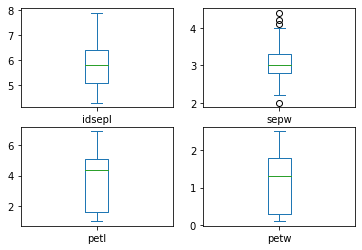

In [9]:
# box and whisker plots
dataset.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
plt.show()

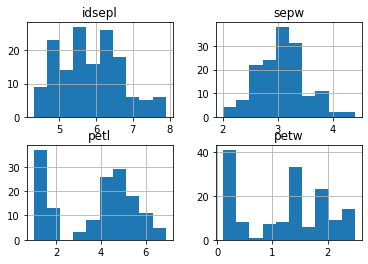

In [10]:
# histograms
dataset.hist()
plt.show()

# Multivariate Plot

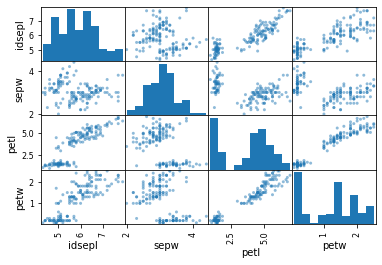

In [11]:
# scatter plot matrix
scatter_matrix(dataset)
plt.show()

# Create a model

In [12]:
# Split-out validation dataset
# 80% Training data set
# 20% Validation data set
array = dataset.values # Define an array
X = array[:,0:4]
Y = array[:,4]
validation_size = 0.20
seed = 6
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)

In [13]:
# Test options and evaluation metric
seed = 6
scoring = 'accuracy'

In [14]:
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

In [15]:
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression(solver='newton-cg')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

In [16]:
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed,shuffle=True)
    cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.958333 (0.041667)
LDA: 0.975000 (0.038188)
KNN: 0.958333 (0.041667)
CART: 0.950000 (0.040825)
NB: 0.966667 (0.040825)
SVM: 0.941667 (0.053359)


In [17]:
# Make predictions on validation dataset using knn
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
predictions = knn.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.9666666666666667
[[ 9  0  0]
 [ 0  9  1]
 [ 0  0 11]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         9
Iris-versicolor       1.00      0.90      0.95        10
 Iris-virginica       0.92      1.00      0.96        11

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30



In [18]:
# Make predictions on validation dataset using LDA
LDA = LinearDiscriminantAnalysis()
LDA.fit(X_train, Y_train)
predictions = LDA.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

1.0
[[ 9  0  0]
 [ 0 10  0]
 [ 0  0 11]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         9
Iris-versicolor       1.00      1.00      1.00        10
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



In [19]:
# Make predictions on validation dataset using LR
LR = LogisticRegression()
LR.fit(X_train, Y_train)
predictions = LR.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.9666666666666667
[[ 9  0  0]
 [ 0 10  0]
 [ 0  1 10]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         9
Iris-versicolor       0.91      1.00      0.95        10
 Iris-virginica       1.00      0.91      0.95        11

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30



In [20]:
# Make predictions on validation dataset using CART
cart = DecisionTreeClassifier()
cart.fit(X_train, Y_train)
predictions = cart.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.9333333333333333
[[ 9  0  0]
 [ 0 10  0]
 [ 0  2  9]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         9
Iris-versicolor       0.83      1.00      0.91        10
 Iris-virginica       1.00      0.82      0.90        11

       accuracy                           0.93        30
      macro avg       0.94      0.94      0.94        30
   weighted avg       0.94      0.93      0.93        30



In [21]:
# Make predictions on validation dataset using NB
NB = GaussianNB()
NB.fit(X_train, Y_train)
predictions = NB.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.9333333333333333
[[ 9  0  0]
 [ 0 10  0]
 [ 0  2  9]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         9
Iris-versicolor       0.83      1.00      0.91        10
 Iris-virginica       1.00      0.82      0.90        11

       accuracy                           0.93        30
      macro avg       0.94      0.94      0.94        30
   weighted avg       0.94      0.93      0.93        30



In [22]:
# Make predictions on validation dataset using SVM
SVM = SVC()
SVM.fit(X_train, Y_train)
predictions = SVM.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

1.0
[[ 9  0  0]
 [ 0 10  0]
 [ 0  0 11]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         9
Iris-versicolor       1.00      1.00      1.00        10
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

